In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Aquisição

In [34]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Análise exploratória de dados (EDA)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Visualização

In [37]:
from matplotlib import pyplot as plt

In [38]:
def plotHist():
    columns = list(df.columns)
    for column in columns:
        plt.title(column)
        plt.hist(df[column], bins=30)
        plt.show()

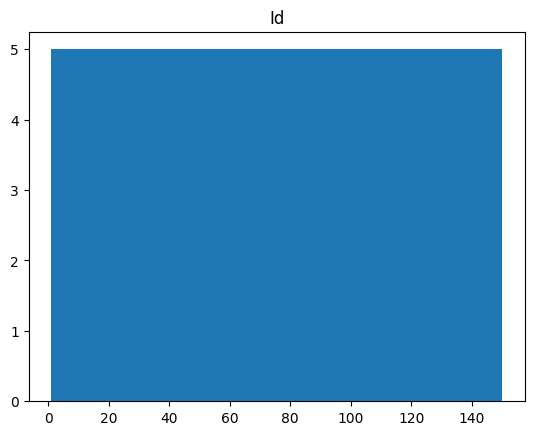

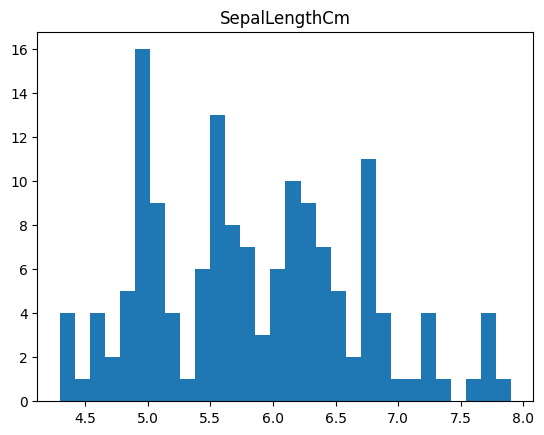

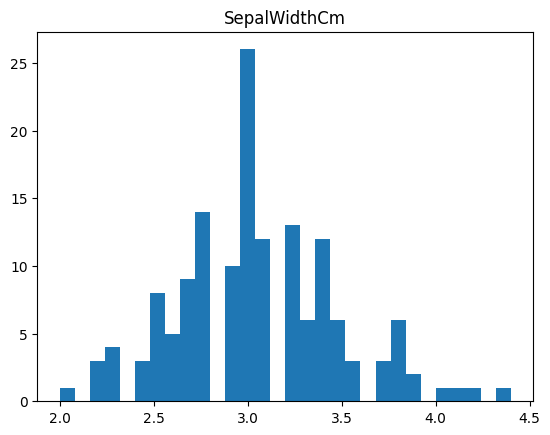

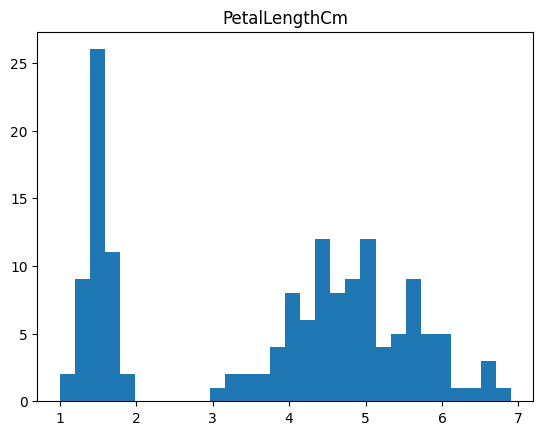

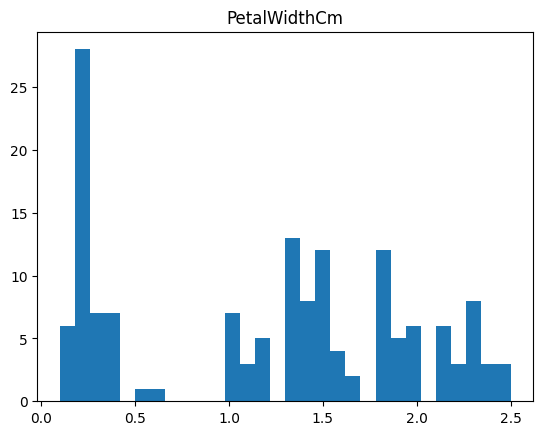

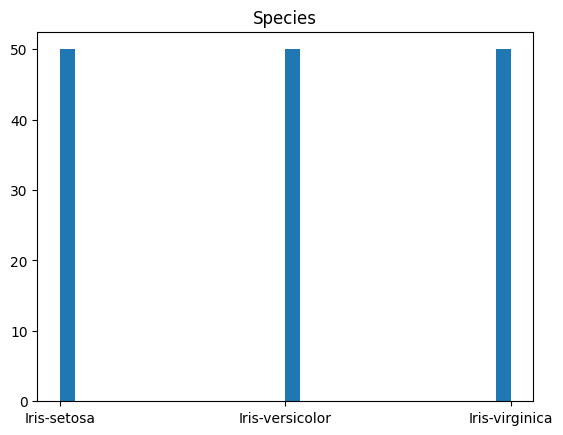

In [39]:
plotHist()

In [40]:
df_setosa     = df[df["Species"] == "Iris-setosa"]
df_versicolor = df[df["Species"] == "Iris-versicolor"]
df_virginica  = df[df["Species"] == "Iris-virginica"]

In [41]:
def plotClassHist(bins, alpha):
    for column in df.columns:
        plt.title(column)
        plt.hist(df_setosa[column], color="blue", alpha=alpha, bins=bins)
        plt.hist(df_virginica[column], color="red", alpha=alpha, bins=bins)
        plt.hist(df_versicolor[column], color="green", alpha=alpha, bins=bins)
        plt.show()

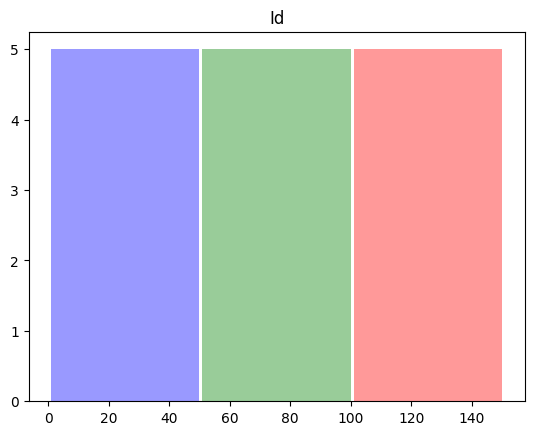

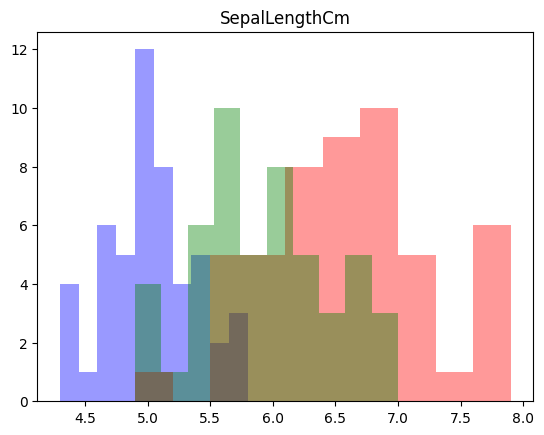

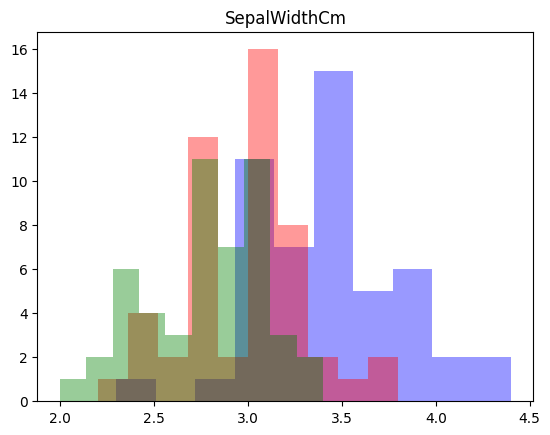

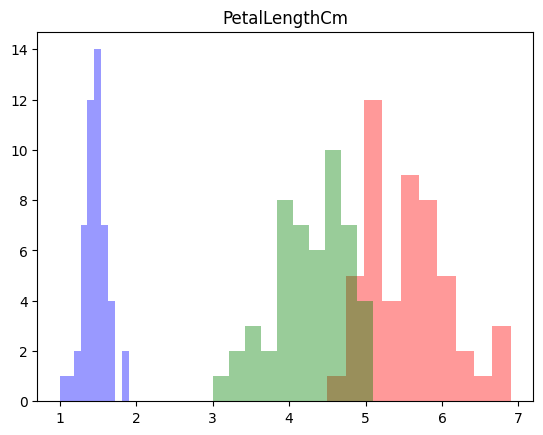

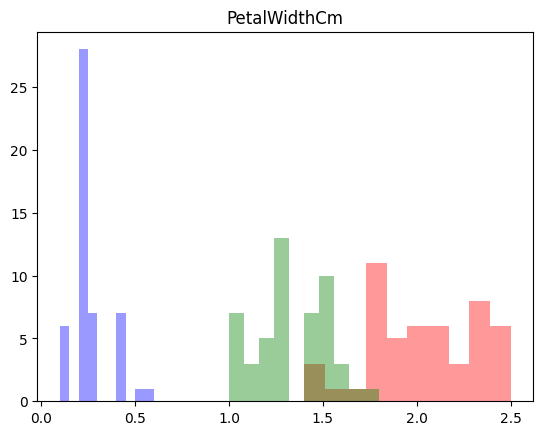

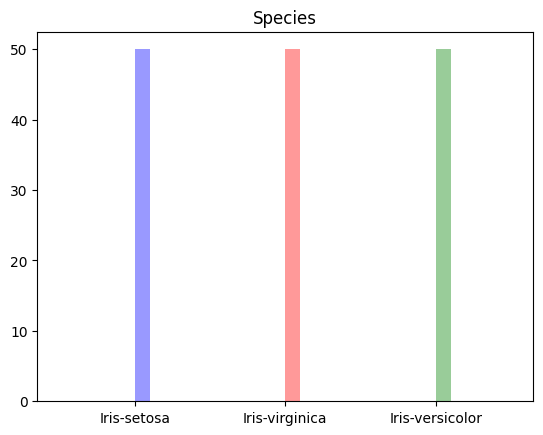

In [42]:
plotClassHist(10, 0.4)

In [43]:
def plotFeatureSpace():
    columns = df.columns
    for i in range(1,len(columns)-2):
        for j in range(i+1, len(columns)-1):
            column1 = columns[i]
            column2 = columns[j]
            plt.title(column1 + " x "+ column2)
            plt.scatter(df_setosa[column1], df_setosa[column2], color="blue")
            plt.scatter(df_virginica[column1], df_virginica[column2], color="red")
            plt.scatter(df_versicolor[column1], df_versicolor[column2], color="green")
            plt.show()
            

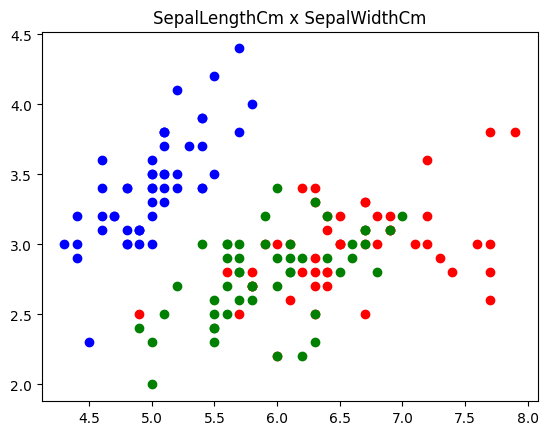

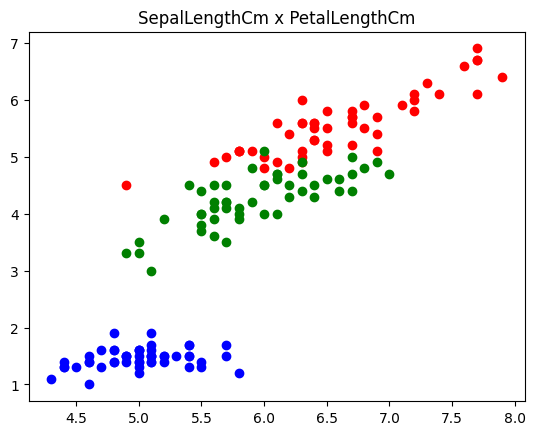

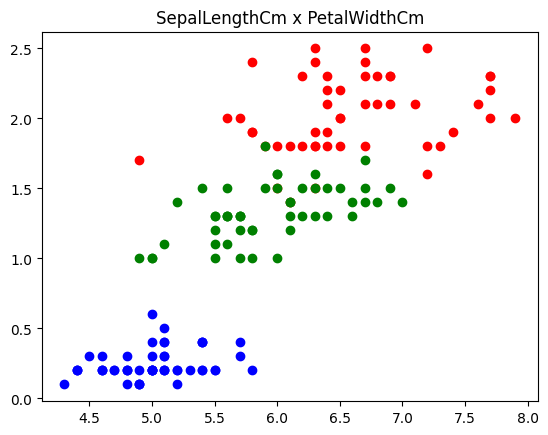

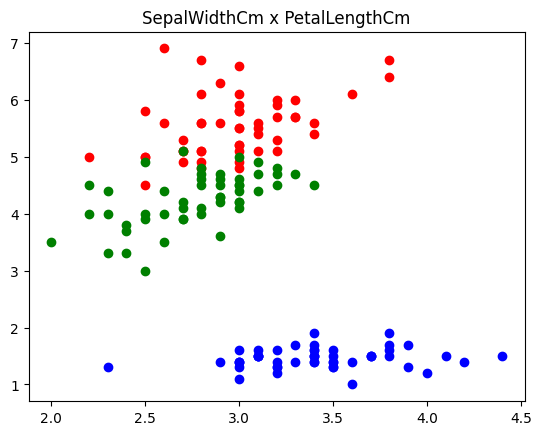

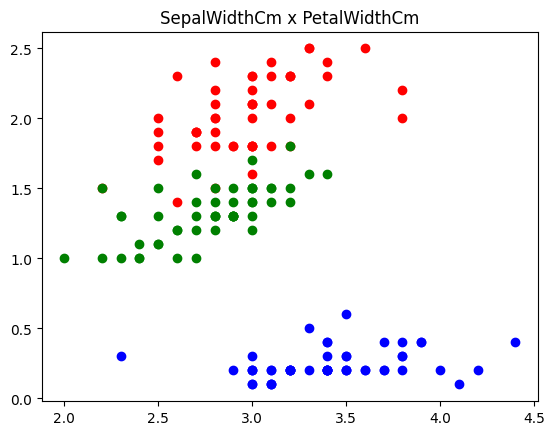

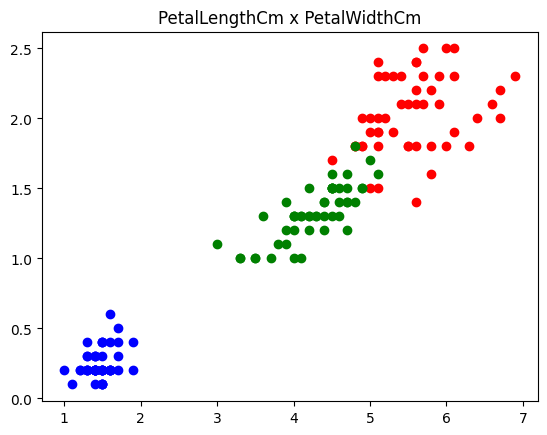

In [44]:
plotFeatureSpace()

# Seleção de atributos

In [45]:
#df.loc[:, "SepalLengthCm":"Species"]
#df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
x = df.iloc[:,1:5]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
y = df["Species"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### Transformações de dados

* Normalizer: é utilizado para normalizar o dataset (transformando os valores entre 0 e 1)
* LabelEncoder: transforma uma coluna literal em numérica (atribui um número para cada valor)

In [51]:
from sklearn.preprocessing import Normalizer, LabelEncoder

In [ ]:
t1 = Normalizer()
xt = t1.fit_transform(x)
xt

In [53]:
t2 = LabelEncoder()
yt = t2.fit_transform(y)
yt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Separar os conjuntos de teste e treino

In [48]:
from sklearn.model_selection import train_test_split

In [54]:
x_treino, x_teste, y_treino, y_teste = train_test_split(xt, yt)

# Escolha dos modelos
Neste exemplo, utilizaremos o KNearstNeighbors (KNeighborsClassifier)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

### 1 - Instanciar o modelo

In [66]:
modelo = KNeighborsClassifier()

### 2 - Treinar o modelo

In [67]:
modelo.fit(x_treino, y_treino)

KNeighborsClassifier()

### 3 - Gerar as previsões do modelo

In [68]:
y_previsto = modelo.predict(x_treino)

### 4 - Tirar as métricas do modelo

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [71]:
confusion_matrix(y_treino, y_previsto)

array([[34,  0,  0],
       [ 0, 39,  1],
       [ 0,  0, 38]])

In [72]:
accuracy_score(y_treino, y_previsto)

0.9910714285714286

In [75]:
precision_score(y_treino, y_previsto, average=None)

array([1.        , 1.        , 0.97435897])

In [76]:
recall_score(y_treino, y_previsto, average=None)

array([1.   , 0.975, 1.   ])

In [77]:
f1_score(y_treino, y_previsto, average=None)

array([1.        , 0.98734177, 0.98701299])

# Avaliação do conjunto de testes

In [78]:
y_prev_teste = modelo.predict(x_teste)

In [80]:
confusion_matrix(y_teste, y_prev_teste)

array([[16,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 12]])

In [82]:
precision_score(y_teste, y_prev_teste, average=None)

array([1.        , 1.        , 0.92307692])

In [81]:
recall_score(y_teste, y_prev_teste, average=None)

array([1. , 0.9, 1. ])

In [83]:
f1_score(y_teste, y_prev_teste, average=None)

array([1.        , 0.94736842, 0.96      ])